In [1]:
!pwd

/home/giakhang/dev/SCFlow


In [1]:
import trimesh
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import json
from tools.visualize import draw_detections

# LUMI Piano Dataset

In [2]:
num = 7
track_num = f"track_{num:02d}"
src_dir = Path(f"./data/lumi_piano_dataset/data/{track_num}")

output_dir = Path(f"./work_dirs/scflow_lumi_piano_real_mix_syn_2025_03_26/val_results/data/{track_num}")

img_idx = 361
pose_idx = 0

img_path = src_dir / f"rgb/{img_idx:05d}.png"
cad_path = "./data/lumi_piano_dataset/models_1080_mm/LUMI.obj"
gt_path = output_dir / "scene_gt.json"
camera_info_path = src_dir / "scene_camera.json"

In [3]:
img = cv2.imread(str(img_path))[..., ::-1]

mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

with open(gt_path) as f:
    gt = json.load(f)
with open(camera_info_path) as f:
    camera_info = json.load(f)

K = np.array(camera_info[str(img_idx)]["cam_K"]).reshape(3, 3)

rot = np.array(gt[str(img_idx)][pose_idx]["cam_R_m2c"]).reshape(3, 3)

trans = np.array(gt[str(img_idx)][pose_idx]["cam_t_m2c"])

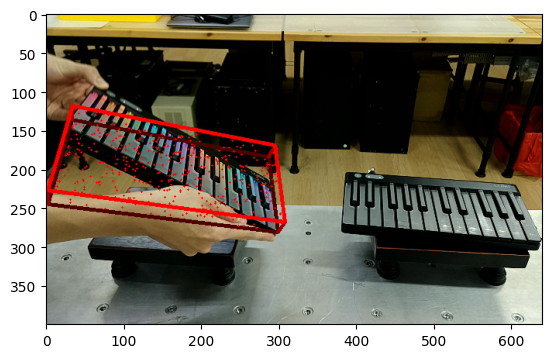

In [4]:
vis_img = draw_detections(img, rot[None, ...], trans[None, ...], mesh, K[None, ...])
plt.imshow(vis_img)

# LUMI Piano Syn. Dataset

In [17]:
num = 3
track_num = f"synthetic_data{num}"
src_dir = Path(f"./data/syn_lumi_piano_dataset/data/{track_num}")

img_idx = 200
pose_idx = 3

img_path = src_dir / f"rgb/{img_idx:05d}.png"
cad_path = "./data/syn_lumi_piano_dataset/models_1080_mm/LUMI.obj"
gt_path = src_dir / "scene_gt.json"
camera_info_path = src_dir / "scene_camera.json"

In [18]:
img = cv2.imread(str(img_path))[..., ::-1]

mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

with open(gt_path) as f:
    gt = json.load(f)
with open(camera_info_path) as f:
    camera_info = json.load(f)

K = np.array(camera_info[str(img_idx)]["cam_K"]).reshape(3, 3)

rot = np.array(gt[str(img_idx)][pose_idx]["cam_R_m2c"]).reshape(3, 3)

trans = np.array(gt[str(img_idx)][pose_idx]["cam_t_m2c"])

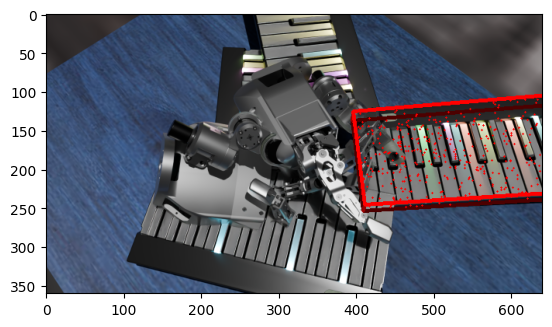

In [19]:
vis_img = draw_detections(img, rot[None, ...], trans[None, ...], mesh, K[None, ...])
plt.imshow(vis_img)

# YCBV DATASET

In [2]:
num = 51
track_num = f"{num:06d}"
src_dir = Path(f"./data/ycbv/test/{track_num}")
output_dir = Path(f"./output/{track_num}")

img_idx = 1
pose_idx = 1
obj_idx = 3

img_path = src_dir / f"rgb/{img_idx:06d}.png"
cad_path = f"./data/ycbv/models_1024/obj_{obj_idx:06d}.ply"

gt_path = output_dir / "scene_gt.json"
camera_info_path = src_dir / "scene_camera.json"

In [3]:
img = cv2.imread(str(img_path))[..., ::-1]

mesh = trimesh.load_mesh(cad_path)
mesh = mesh.sample(1024).astype(np.float32)

with open(gt_path) as f:
    gt = json.load(f)
with open(camera_info_path) as f:
    camera_info = json.load(f)

K = np.array(camera_info[str(img_idx)]["cam_K"]).reshape(3, 3)

rot = np.array(gt[str(img_idx)][pose_idx]["cam_R_m2c"]).reshape(3, 3)

trans = np.array(gt[str(img_idx)][pose_idx]["cam_t_m2c"])

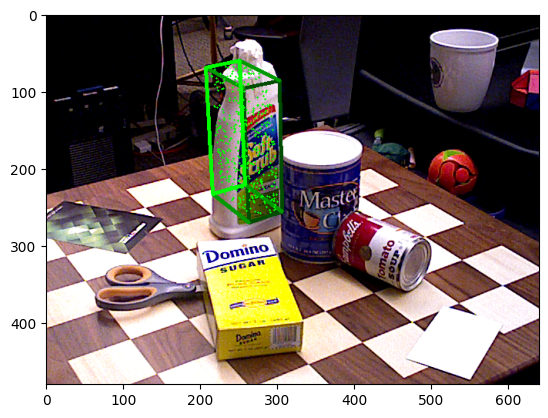

In [4]:
vis_img = draw_detections(img, rot[None, ...], trans[None, ...], mesh, K[None, ...], color=(0, 255, 0))
plt.imshow(vis_img)